# 1. Load and Explore Dataset

The first step involves loading all four datasets into Python, exploring their structure and preview the first few rows of each.

In [1]:
# import libraries
import pandas as pd

In [2]:
# Load datasets
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')
pizza_types = pd.read_csv('pizza_types.csv', encoding = 'latin1')

In [3]:
# Preview dataset
print("Orders Dataset")
print(orders.head())
print("\nOrder Details Dataset")
print(order_details.head())
print("\nPizzas Dataset")
print(pizzas.head())
print("\nPizza Types Dataset")
print(pizza_types.head())

Orders Dataset
   order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30

Order Details Dataset
   order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1

Pizzas Dataset
     pizza_id pizza_type_id size  price
0   bbq_ckn_s       bbq_ckn    S  12.75
1   bbq_ckn_m       bbq_ckn    M  16.75
2   bbq_ckn_l       bbq_ckn    L  20.75
3  cali_ckn_s      cali_ckn    S  12.75
4  cali_ckn_m      cali_ckn    M  16.75

Pizza Types Dataset
  pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chi

# 2. Data Cleaning & Preprocessing

Once loaded, clean and preprocess the datasets to address common issues like missing values, duplicate rows, or inconsistent formatting issues and resolve them.

In [4]:
# Check for missing values
print("Missing values in Order Details:")
print(order_details.isnull().sum())

print("\nMissing values in Orders:")
print(orders.isnull().sum())

print("\nMissing values in Pizzas:")
print(pizzas.isnull().sum())

print("\nMissing values in Pizza Types:")
print(pizza_types.isnull().sum())

Missing values in Order Details:
order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

Missing values in Orders:
order_id    0
date        0
time        0
dtype: int64

Missing values in Pizzas:
pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

Missing values in Pizza Types:
pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64


In [5]:
# Check for duplicates
print("Duplicate rows in Order Details:", order_details.duplicated().sum())
print("Duplicate rows in Orders:", orders.duplicated().sum())
print("Duplicate rows in Pizzas:", pizzas.duplicated().sum())
print("Duplicate rows in Pizzas Types:", pizza_types.duplicated().sum())


Duplicate rows in Order Details: 0
Duplicate rows in Orders: 0
Duplicate rows in Pizzas: 0
Duplicate rows in Pizzas Types: 0


# 3. Data Validation (Ensure Accuracy & Consistency)

Validate the data to ensure relationships between tables, column data types, and value ranges are accurate.

In [6]:
# Validate column data types
print("\nOrders Data Types:")
print(orders.dtypes)
print("\nOrder Details Data Types:")
print(order_details.dtypes)
print("\nPizzas Data Types:")
print(pizzas.dtypes)
print("\nPizza Types Data Types:")
print(pizza_types.dtypes)

# Check for invalid values in numeric columns
print("\nInvalid quantities in Order Details:")
print(order_details[order_details['quantity'] <= 0])


Orders Data Types:
order_id     int64
date        object
time        object
dtype: object

Order Details Data Types:
order_details_id     int64
order_id             int64
pizza_id            object
quantity             int64
dtype: object

Pizzas Data Types:
pizza_id          object
pizza_type_id     object
size              object
price            float64
dtype: object

Pizza Types Data Types:
pizza_type_id    object
name             object
category         object
ingredients      object
dtype: object

Invalid quantities in Order Details:
Empty DataFrame
Columns: [order_details_id, order_id, pizza_id, quantity]
Index: []


# 4. Data Analysis and Visualization (Trends & Correlation)

Once the data is clean and validated, use Python (Matplotlib/Seaborn) to create visualizations.

In [7]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Calculate the total orders placed and the total revenue from pizza sales.

In [8]:
# Total Orders Placed
total_orders = orders['order_id'].nunique()
print(f"Total Orders Placed: {total_orders}")

# Merge order_details with pizzas to calculate revenue
merged_order_pizzas = pd.merge(order_details, pizzas, on='pizza_id')
merged_order_pizzas['revenue'] = merged_order_pizzas['quantity'] * merged_order_pizzas['price']

# Calculate total revenue
total_revenue = merged_order_pizzas['revenue'].sum()
print(f"Total Revenue from Pizza Sales: ${total_revenue:.2f}")

# Highest Priced Pizza
highest_price = pizzas['price'].max()
highest_pizza = pizzas[pizzas['price'] == highest_price]['pizza_id'].values[0]
print(f"Highest-Priced Pizza: {highest_pizza} (${highest_price:.2f})")

Total Orders Placed: 21350
Total Revenue from Pizza Sales: $817860.05
Highest-Priced Pizza: the_greek_xxl ($35.95)


## 1. Most Common Pizza Size Ordered

Most Common Pizza Size Ordered: S




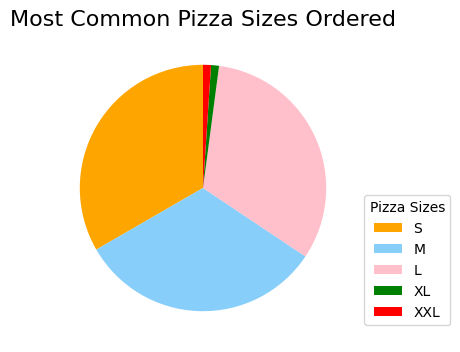

In [9]:
# Calculate most common pizza size
size_counts = pizzas['size'].value_counts()
most_common_size = size_counts.idxmax()
print(f"Most Common Pizza Size Ordered: {most_common_size}")
print("\n")

# Visualize pizza size distribution
plt.figure(figsize = (4, 4))
wedges, texts = plt.pie(size_counts, startangle = 90, colors = ['orange', 'lightskyblue', 'pink', 'green','red'])
plt.title('Most Common Pizza Sizes Ordered', fontsize = 16)

# Add a legend
plt.legend(wedges, size_counts.index, title = "Pizza Sizes", loc = "best", bbox_to_anchor = (1, 0.5))
plt.show()


## 2. Top 5 Most Ordered Pizza Types

In [10]:
# Calculate top 5 most ordered pizza types
merged_types = pd.merge(merged_order_pizzas, pizza_types, on = 'pizza_type_id')
top_5_pizzas = merged_types.groupby('name')['quantity'].sum().sort_values(ascending = False).head(5)

# Create a DataFrame for Top 5 Most Ordered Pizza Types
top_5_pizzas_df = top_5_pizzas.reset_index() # Convert series to DataFrame
top_5_pizzas_df.columns = ['Pizza Name', 'Total Ordered'] # Rename columns

# Print as a table
print("Top 5 Most Ordered Pizza Types:")
print(top_5_pizzas_df.to_string(index = False))

Top 5 Most Ordered Pizza Types:
                Pizza Name  Total Ordered
  The Classic Deluxe Pizza           2453
The Barbecue Chicken Pizza           2432
        The Hawaiian Pizza           2422
       The Pepperoni Pizza           2418
    The Thai Chicken Pizza           2371


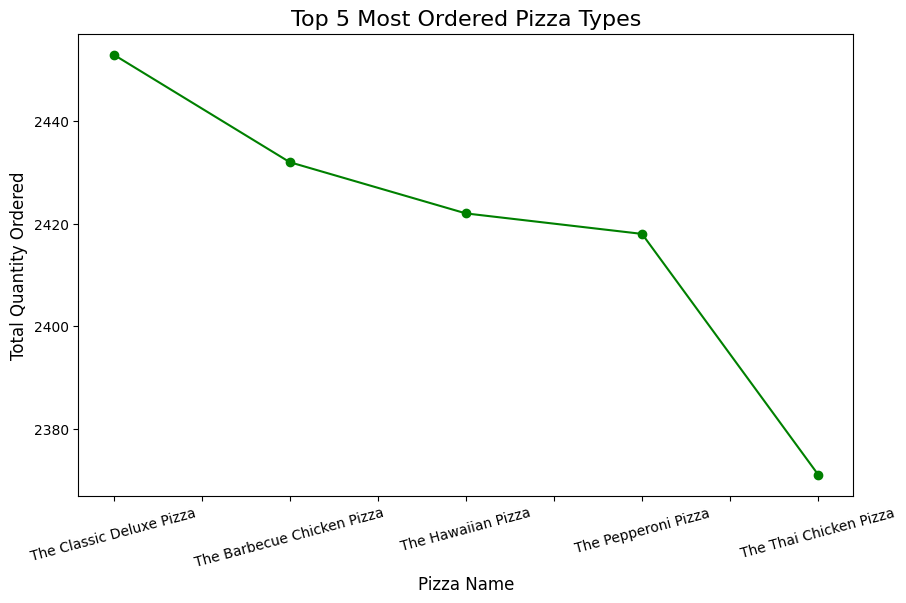

In [11]:
# Visualize top 5 pizza types
plt.figure(figsize=(10, 6))
top_5_pizzas.plot(kind = 'line', color = 'green', marker = 'o')
plt.title('Top 5 Most Ordered Pizza Types', fontsize = 16)
plt.xlabel('Pizza Name', fontsize=12)
plt.ylabel('Total Quantity Ordered', fontsize = 12)
plt.xticks(rotation = 15)
plt.show()


## 3. Total Quantity Ordered by Pizza Category

In [12]:
# Calculate total quantity by category
quantity_by_category = merged_types.groupby('category')['quantity'].sum()

# Create a DataFrame for total pizza ordered by Pizza Category
quantity_by_category_df = quantity_by_category.reset_index() # Convert series to DataFrame
quantity_by_category_df.columns = ['Category', 'Total Ordered'] # Rename columns

# Display total Quantity Ordered by Pizza Category as a table
print("Total Quantity Ordered by Pizza Category:")
print(quantity_by_category_df.to_string(index = False))

Total Quantity Ordered by Pizza Category:
Category  Total Ordered
 Chicken          11050
 Classic          14888
 Supreme          11987
  Veggie          11649


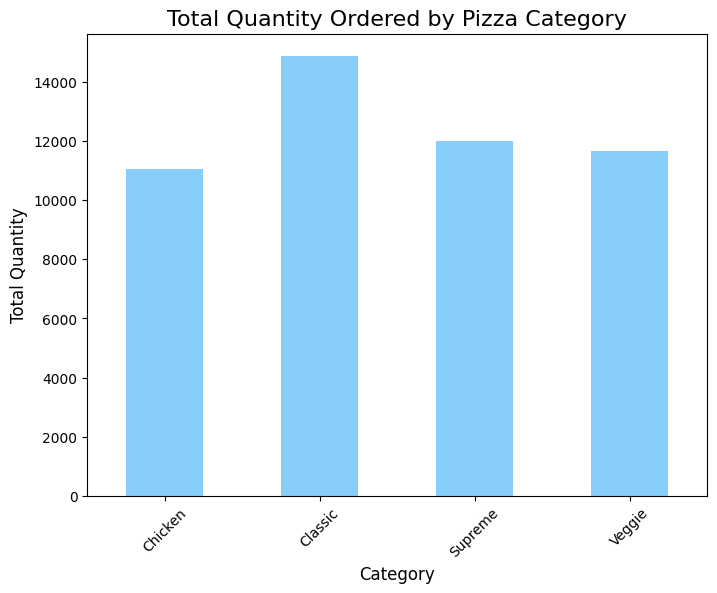

In [13]:
# Visualize quantity ordered by category
plt.figure(figsize= (8, 6))
quantity_by_category.plot(kind = 'bar', color = 'lightskyblue')
plt.title('Total Quantity Ordered by Pizza Category', fontsize = 16)
plt.xlabel('Category', fontsize = 12)
plt.ylabel('Total Quantity', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()


## 4. Order Distribution by Hour of the Day

In [14]:
# Extract hour from the time column
orders['hour'] = pd.to_datetime(orders['time'], format = '%H:%M:%S').dt.hour

# Calculate hourly order distribution
hourly_orders = orders['hour'].value_counts().sort_index()

# Create a DataFrame for hourly orders distribution
hourly_orders_df = hourly_orders.reset_index() # Convert series to DataFrame
hourly_orders_df.columns = ['Hour', 'Orders'] # Rename columns

# Display hourly orders as a table
print("Order Distribution by Hour of the Day:")
print(hourly_orders_df.to_string(index = False))

Order Distribution by Hour of the Day:
 Hour  Orders
    9       1
   10       8
   11    1231
   12    2520
   13    2455
   14    1472
   15    1468
   16    1920
   17    2336
   18    2399
   19    2009
   20    1642
   21    1198
   22     663
   23      28


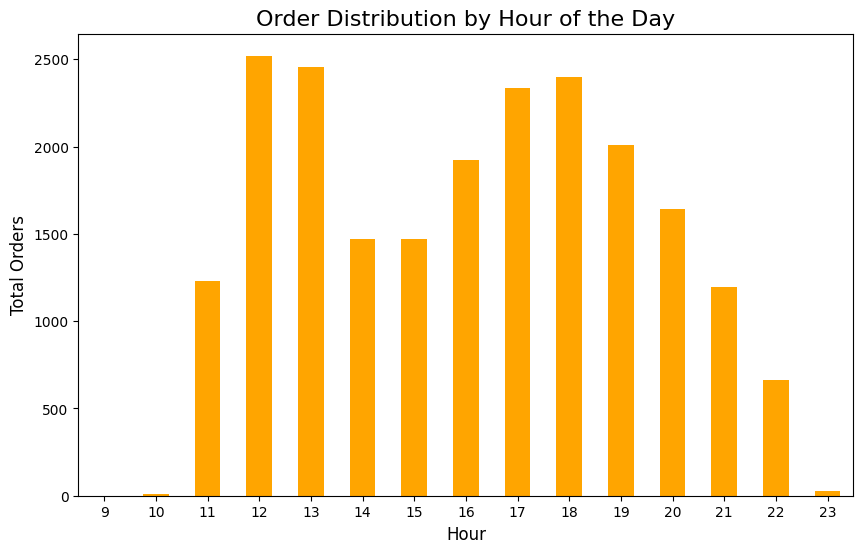

In [15]:
# Visualize hourly order distribution
plt.figure(figsize= (10, 6))
hourly_orders.plot(kind = 'bar', color = 'orange')
plt.title('Order Distribution by Hour of the Day', fontsize = 16)
plt.xlabel('Hour', fontsize = 12)
plt.xticks(rotation = 0)  # Align hours for better readability
plt.ylabel('Total Orders', fontsize = 12)
plt.show()

## 5. Average Number of Pizzas Ordered Per Day

Average Number of Pizzas Ordered Per Day:  138.47




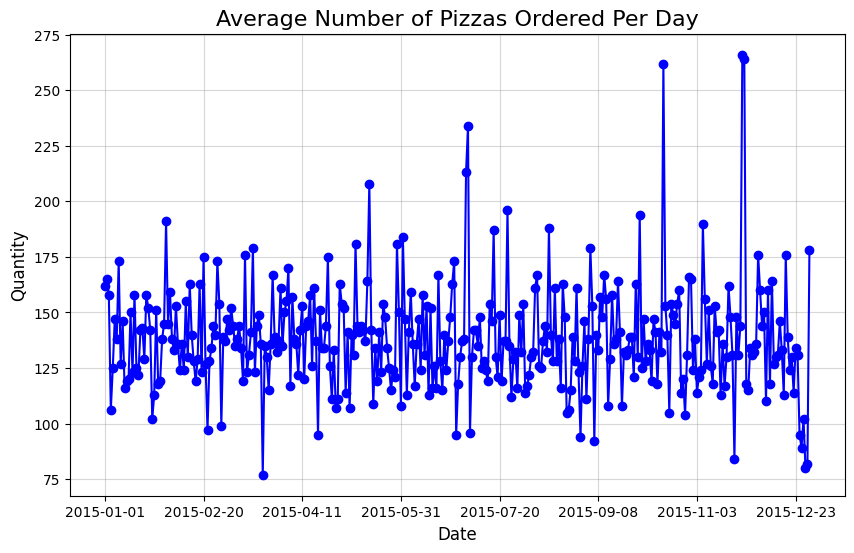

In [16]:
# Merge orders with order details to include 'date'
merged_orders = pd.merge(orders, order_details, on = 'order_id')

# Group by 'date' and calculate total quantity ordered per day
daily_quantities = merged_orders.groupby('date')['quantity'].sum()

# Calculate the average number of pizzas ordered per day
avg_pizzas_per_day = daily_quantities.mean()
print(f"Average Number of Pizzas Ordered Per Day: {avg_pizzas_per_day : .2f}")
print("\n")

# Visualize the average number of pizzas ordered per day
plt.figure(figsize = (10, 6))
daily_quantities.plot(kind = 'line', marker = 'o', color = 'blue')
plt.title('Average Number of Pizzas Ordered Per Day', fontsize = 16)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Quantity', fontsize = 12)
plt.grid(alpha = 0.5)
plt.show()

## 6. Category-Wise Pizza Sales Distribution

In [17]:
# Merge data to include necessary columns for calculation
merged_types = pd.merge(merged_order_pizzas, pizza_types, on = 'pizza_type_id')

# Calculate total revenue by category
revenue_by_category = merged_types.groupby('category')['revenue'].sum()

# Calculate percentage contribution by category
category_percentage = (revenue_by_category / total_revenue) * 100

# Create a DataFrame for Category-Wise Pizza Sales Distribution
category_percentage_df = category_percentage.reset_index() 
category_percentage_df.columns = ['Pizza_Category', 'Sales_Distrubtion'] 

# Display Category-Wise Pizza Sales Distribution as a table
print("Category-Wise Pizza Sales Distribution (%):")
print(category_percentage_df.to_string (index = False))


Category-Wise Pizza Sales Distribution (%):
Pizza_Category  Sales_Distrubtion
       Chicken          23.955138
       Classic          26.905960
       Supreme          25.456311
        Veggie          23.682591


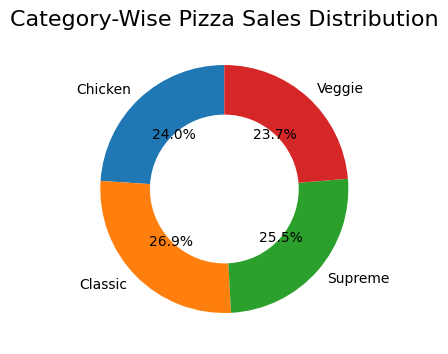

In [18]:
# Visualize category-wise revenue distribution
plt.figure(figsize = (4, 8))
plt.pie(revenue_by_category, labels = revenue_by_category.index, autopct = '%1.1f%%', startangle = 90, wedgeprops = dict(width = 0.4))
plt.title('Category-Wise Pizza Sales Distribution', fontsize = 16)
plt.show()

## 7. Top 3 Pizza Types Based on Revenue

In [19]:
# Group by pizza name and calculate total revenue
top_3_revenue_pizzas = merged_types.groupby('name')['revenue'].sum().sort_values(ascending = False).head(3)

# Create a DataFrame for the top 3 pizza types
top_3_revenue_pizzas_df = top_3_revenue_pizzas.reset_index()  # Convert series to DataFrame
top_3_revenue_pizzas_df.columns = ['Pizza Name', 'Revenue']   # Rename columns

# Display Top 3 Pizza Types by Revenue as a table
print("\nTop 3 Pizza Types by Revenue:")
print(top_3_revenue_pizzas_df.to_string(index = False))


Top 3 Pizza Types by Revenue:
                  Pizza Name  Revenue
      The Thai Chicken Pizza 43434.25
  The Barbecue Chicken Pizza 42768.00
The California Chicken Pizza 41409.50


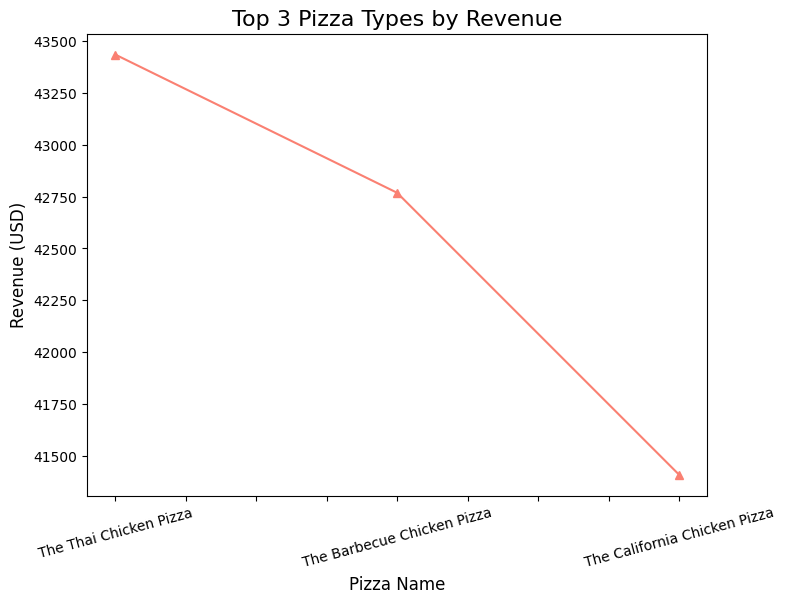

In [20]:
# Visualize revenue of the top 3 pizzas
plt.figure(figsize=(8, 6))
top_3_revenue_pizzas.plot(kind = 'line', color = 'salmon', marker = '^')
plt.title('Top 3 Pizza Types by Revenue', fontsize = 16)
plt.xlabel('Pizza Name', fontsize = 12)
plt.ylabel('Revenue (USD)', fontsize = 12)
plt.xticks(rotation = 15)
plt.show()

## 8. Top 3 Pizza Types by Revenue for Each Category


Top 3 Pizza Types by Rank:
 No. Category                   Pizza Name  Revenue  Rank
   0  Chicken   The Barbecue Chicken Pizza 42768.00   2.0
   1  Chicken The California Chicken Pizza 41409.50   3.0
   5  Chicken       The Thai Chicken Pizza 43434.25   1.0
   7  Classic     The Classic Deluxe Pizza 38180.50   1.0
   9  Classic           The Hawaiian Pizza 32273.25   2.0
  12  Classic          The Pepperoni Pizza 30161.75   3.0
  16  Supreme    The Italian Supreme Pizza 33476.75   2.0
  19  Supreme           The Sicilian Pizza 30940.50   3.0
  21  Supreme      The Spicy Italian Pizza 34831.25   1.0
  23   Veggie        The Five Cheese Pizza 26066.50   3.0
  24   Veggie        The Four Cheese Pizza 32265.70   1.0
  28   Veggie           The Mexicana Pizza 26780.75   2.0




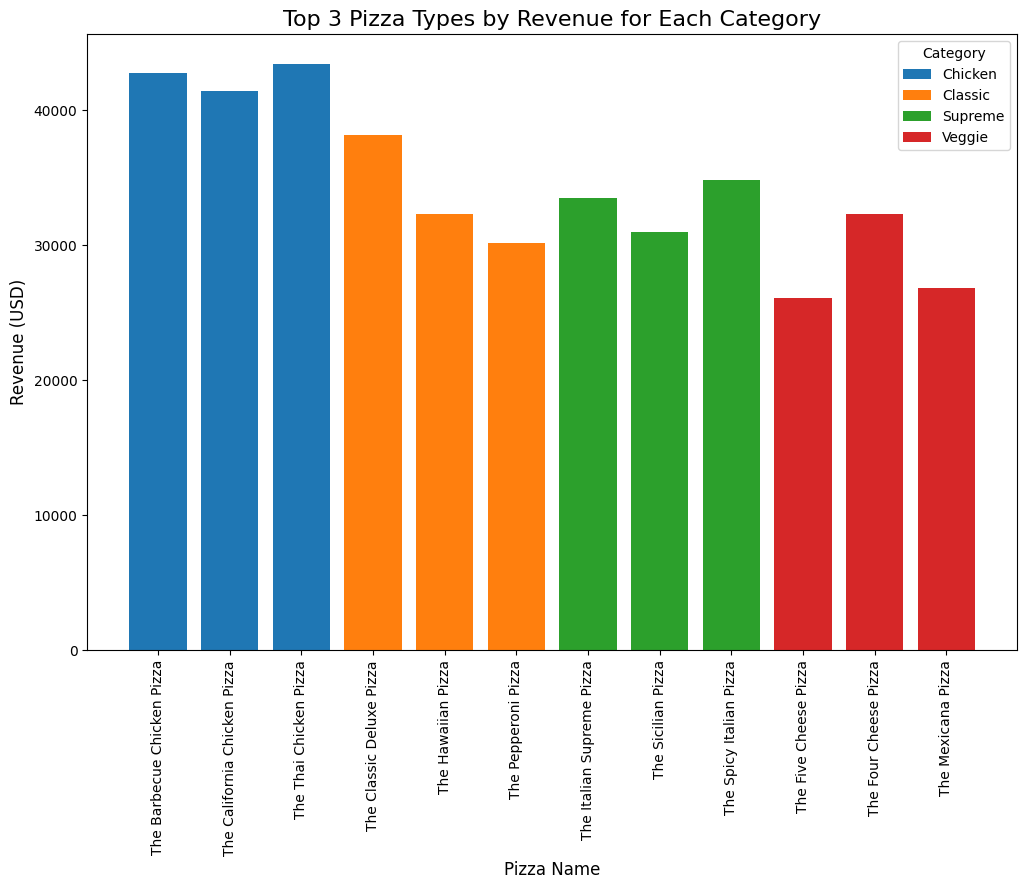

In [21]:
# Group by category and name, calculate revenue
ranked_pizzas = merged_types.groupby(['category', 'name'])['revenue'].sum().reset_index()

# Rank pizzas within each category by revenue
ranked_pizzas['rank'] = ranked_pizzas.groupby('category')['revenue'].rank(ascending = False)

# Filter top 3 pizzas per category
top_3_per_category = ranked_pizzas[ranked_pizzas['rank'] <= 3]

# Create a DataFrame for top 3 pizza by category
top_3_per_category_df = top_3_per_category.reset_index()  # Convert series to DataFrame
top_3_per_category_df.columns = ['No.', 'Category', 'Pizza Name', 'Revenue', 'Rank' ]   # Rename columns

# Display top 3 pizza by category as a table
print("\nTop 3 Pizza Types by Rank:")
print(top_3_per_category_df.to_string(index = False))
print("\n")

# Plot top 3 pizza types by revenue for each category
plt.figure(figsize = (12, 8))
categories = top_3_per_category['category'].unique()

# Create a grouped bar chart for top 3 pizza types per category
for category in categories:
    subset = top_3_per_category[top_3_per_category['category'] == category]
    plt.bar(subset['name'], subset['revenue'], label = category)

# Visualize top 3 pizza types by revenue for each catrgory 
plt.title('Top 3 Pizza Types by Revenue for Each Category', fontsize = 16)
plt.xlabel('Pizza Name', fontsize = 12)
plt.ylabel('Revenue (USD)', fontsize = 12)
plt.xticks(rotation = 90)
plt.legend(title = 'Category')
plt.show()

## 9. Monthly Revenue Trends


Monthly Revenue:
  Month  Revenue
2015-01 73385.50
2015-02 68281.50
2015-03 69541.25
2015-04 83734.00
2015-05 62941.25
2015-06 64862.75
2015-07 72757.50
2015-08 58167.50
2015-09 72773.75
2015-10 60325.25
2015-11 63646.25
2015-12 67163.00


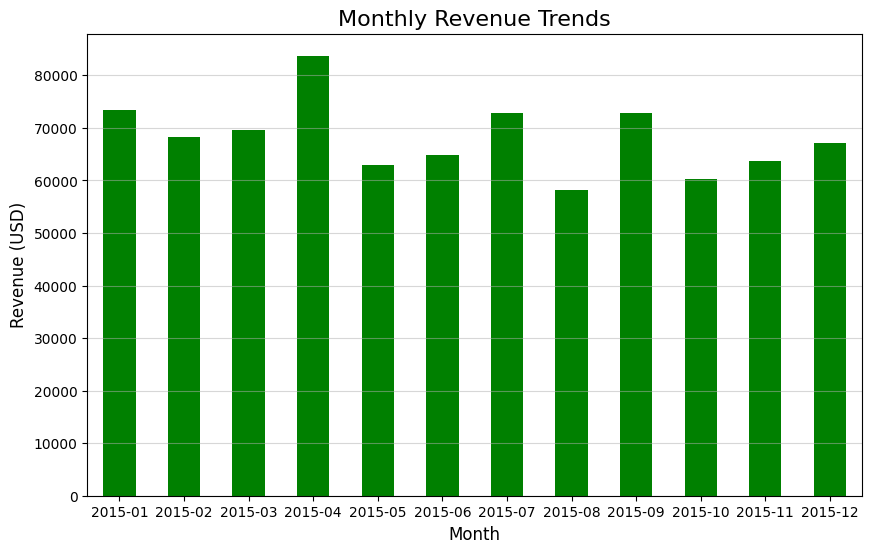

In [29]:
# Extract month and year from the date column
orders['month'] = pd.to_datetime(orders['date']).dt.to_period('M')

# Merge orders with order details to include the required columns
merged_orders = pd.merge(orders, order_details, on='order_id')

# Calculate revenue for each order
merged_orders['revenue'] = merged_orders['quantity'] * merged_order_pizzas['price']  # Add the revenue column

# Group by month and calculate total revenue
monthly_revenue = merged_orders.groupby('month')['revenue'].sum()

# Create a DataFrame for Monthly Revenue
monthly_revenue_df = monthly_revenue.reset_index()  # Convert series to DataFrame
monthly_revenue_df.columns = ['Month', 'Revenue']   # Rename columns

# Display Monthly Revenue as table
print("\nMonthly Revenue:")
print(monthly_revenue_df.to_string(index = False))

# Visualize Monthly Revenue trends
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind = 'bar', color = 'green')
plt.title('Monthly Revenue Trends', fontsize = 16)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Revenue (USD)', fontsize = 12)
plt.xticks(rotation = 0)
plt.grid(axis='y', alpha = 0.5)
plt.show()

## 10. Cumulative Revenue Over Time

In [23]:
# Merge orders with order_details to ensure the 'date' column is included
merged_orders = pd.merge(order_details, orders, on = 'order_id')

# Merge with pizzas to include price and calculate revenue
merged_orders = pd.merge(merged_orders, pizzas, on = 'pizza_id')

# Calculate revenue for each order
merged_orders['revenue'] = merged_orders['quantity'] * merged_orders['price']

# Group by 'date' and calculate daily revenue
daily_revenue = merged_orders.groupby('date')['revenue'].sum()

# Calculate cumulative revenue over time
cumulative_revenue = daily_revenue.cumsum()

# Create a DataFrame for Cumulative Revenue Over Time
cumulative_revenue_df = cumulative_revenue.reset_index()  # Convert series to DataFrame
cumulative_revenue_df.columns = ['Date', 'Revenue']   # Rename columns

# Print as a table
print("\nCumulative Revenue Over Time:")
print(cumulative_revenue_df.to_string(index = False))



Cumulative Revenue Over Time:
      Date   Revenue
2015-01-01   2713.85
2015-01-02   5445.75
2015-01-03   8108.15
2015-01-04   9863.60
2015-01-05  11929.55
2015-01-06  14358.50
2015-01-07  16560.70
2015-01-08  19399.05
2015-01-09  21526.40
2015-01-10  23990.35
2015-01-11  25862.65
2015-01-12  27781.70
2015-01-13  29831.30
2015-01-14  32358.70
2015-01-15  34343.50
2015-01-16  36937.65
2015-01-17  39001.75
2015-01-18  40978.60
2015-01-19  43365.75
2015-01-20  45763.65
2015-01-21  47804.20
2015-01-22  50300.90
2015-01-23  52724.60
2015-01-24  55013.85
2015-01-25  56631.40
2015-01-26  58515.80
2015-01-27  61043.85
2015-01-28  63059.85
2015-01-29  65105.15
2015-01-30  67375.45
2015-01-31  69793.30
2015-02-01  72982.50
2015-02-02  75311.10
2015-02-03  77925.90
2015-02-04  80159.80
2015-02-05  82375.60
2015-02-06  84885.55
2015-02-07  87123.20
2015-02-08  89158.20
2015-02-09  91353.55
2015-02-10  93410.05
2015-02-11  95870.05
2015-02-12  98028.85
2015-02-13 100783.35
2015-02-14 103102.50
201

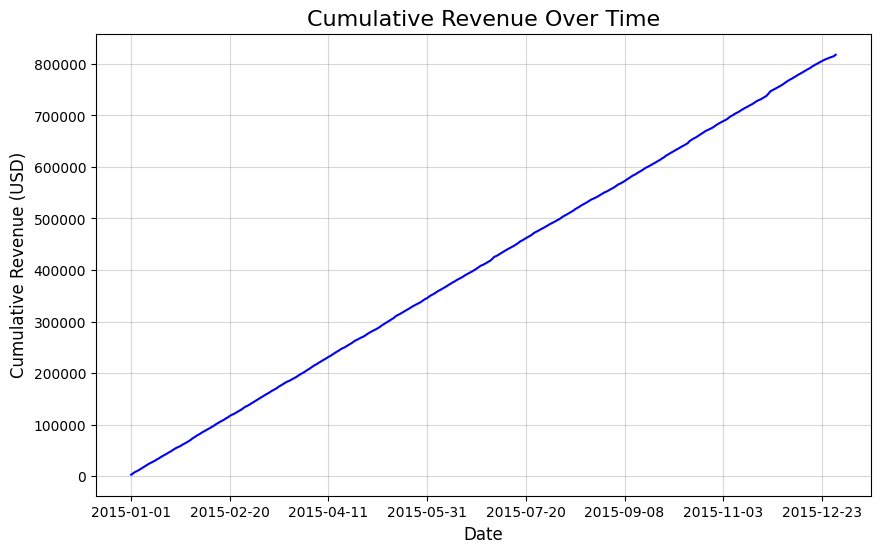

In [28]:
# Visualize cumulative revenue
plt.figure(figsize= (10, 6))
cumulative_revenue.plot(kind = 'line', color = 'blue')
plt.title('Cumulative Revenue Over Time', fontsize = 16)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Cumulative Revenue (USD)', fontsize = 12)
plt.xticks(rotation = 0)
plt.grid(alpha = 0.5)
plt.show()

## 11. Correlation between daily revenue and cumulative revenue

Correlation Coefficient: -0.02



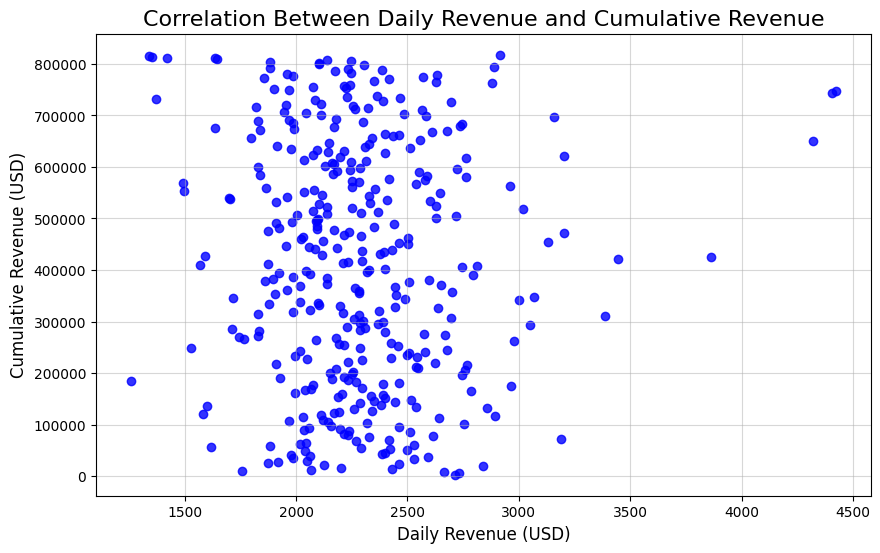

In [26]:
import numpy as np

# Calculate correlation between daily revenue and cumulative revenue
daily_revenue = merged_orders.groupby('date')['revenue'].sum()
cumulative_revenue = daily_revenue.cumsum()
correlation_coefficient = np.corrcoef(daily_revenue, cumulative_revenue)[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient:.2f}\n")

# Scatter plot of correlation
plt.figure(figsize = (10, 6))
plt.scatter(daily_revenue, cumulative_revenue, alpha = 0.8, color = 'blue')
plt.title('Correlation Between Daily Revenue and Cumulative Revenue', fontsize = 16)
plt.xlabel('Daily Revenue (USD)', fontsize = 12)
plt.ylabel('Cumulative Revenue (USD)', fontsize = 12)
plt.grid(alpha = 0.5)
plt.show()
